In [1]:
!pip install seaborn

In [10]:
import seaborn as sns

sns.__version__

'0.9.0'

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

### Automobile Dataset
<b> Source</b>: https://www.kaggle.com/toramky/automobile-dataset

* symboling - Rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling"
    * 3 -> Risky
    * -3 -> pretty safe
* normalized-losses - The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.
* make - making company
* fuel-type - Type of fuels
* aspiration - 
* num-of-doors
* body-style
* drive-wheels
* engine-location
* wheel-base
* length
* width
* height
* curb-weight
* engine-type
* num-of-cylinders
* engine-size
* fuel-system
* bore
* stroke
* compression-ratio
* horsepower
* peak-rpm
* city-mpg
* highway-mpg
* price

#### Import the data

In [12]:
automobile_data = pd.read_csv('datasets/Automobile_data.csv', 
                              na_values = '?')

automobile_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [13]:
automobile_data.shape

(205, 26)

In [14]:
automobile_data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#### Cleaning

In [15]:
automobile_data.dropna(inplace=True)

automobile_data.shape

(159, 26)

#### Saving back to dataset folder for future use

In [16]:
automobile_data.to_csv('datasets/automobile_data_processed.csv', index = False)

In [17]:
automobile_data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

#### Describing the data

In [18]:
automobile_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,159.0,0.735849,1.193086,-2.00,0.000,1.00,2.00,3.00
normalized-losses,159.0,121.132075,35.651285,65.00,94.000,113.00,148.00,256.00
wheel-base,159.0,98.264151,5.167416,86.60,94.500,96.90,100.80,115.60
length,159.0,172.413836,11.523177,141.10,165.650,172.40,177.80,202.60
width,159.0,65.607547,1.947883,60.30,64.000,65.40,66.50,71.70
height,159.0,53.899371,2.268761,49.40,52.250,54.10,55.50,59.80
curb-weight,159.0,2461.138365,481.941321,1488.00,2065.500,2340.00,2809.50,4066.00
engine-size,159.0,119.226415,30.460791,61.00,97.000,110.00,135.00,258.00
bore,159.0,3.300126,0.267336,2.54,3.050,3.27,3.56,3.94
stroke,159.0,3.236352,0.294888,2.07,3.105,3.27,3.41,4.17


* From here we can see that the distribution of price. Most of the vehicle has the price in the range of 5000-10000

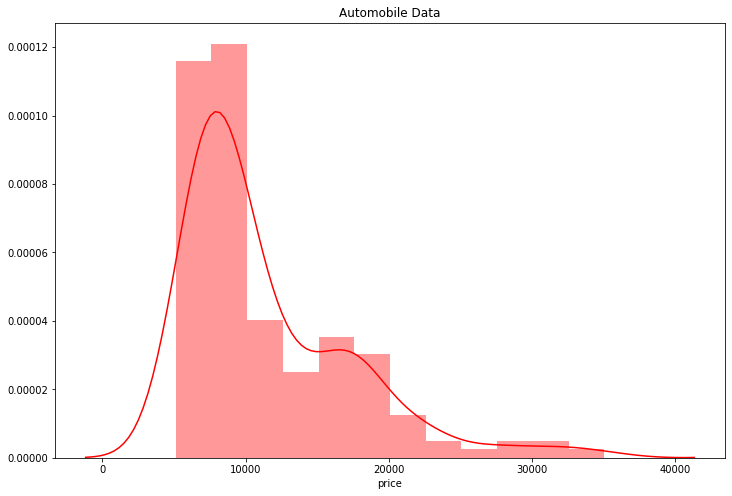

In [19]:
plt.figure(figsize=(12, 8))

sns.distplot(automobile_data['price'], 
             color='red')

plt.title('Automobile Data')

plt.show()

* If we will add more bin then we can see the exact range for the price

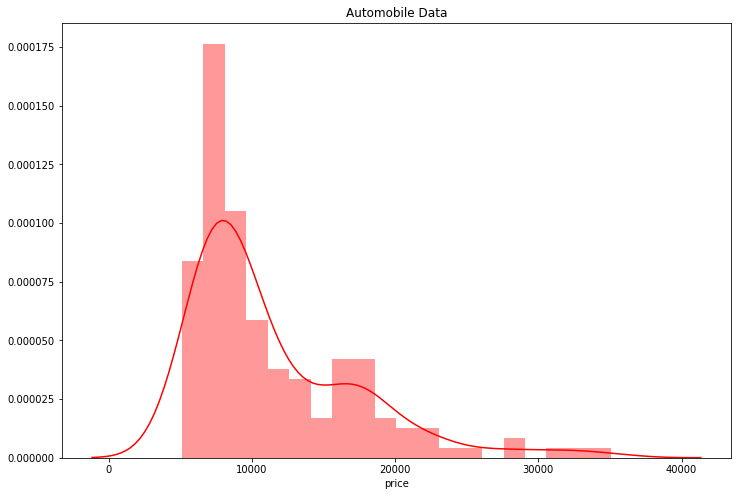

In [20]:
plt.figure(figsize=(12, 8))

sns.distplot(automobile_data['price'], 
             bins=20, color='red')

plt.title('Automobile Data')

plt.show()

* This is just the distplot and see, the distribution

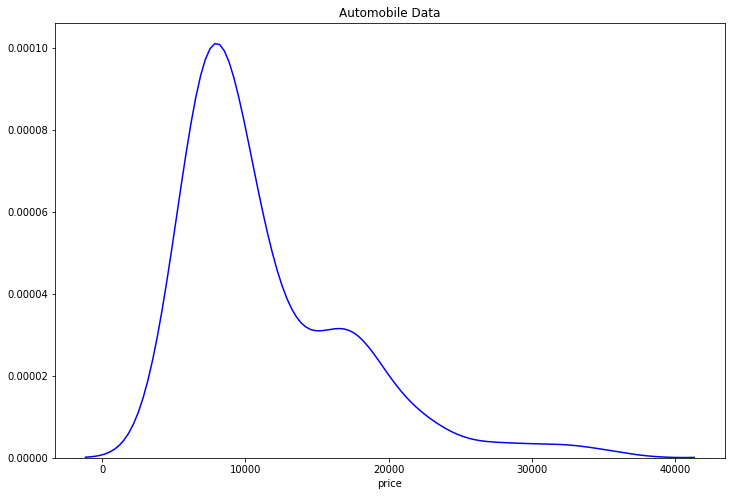

In [21]:
plt.figure(figsize=(12, 8))

sns.distplot(automobile_data['price'], 
             hist=False, color='blue')

plt.title('Automobile Data')

plt.show()

* We can add the bin rug plot also to show the distribution

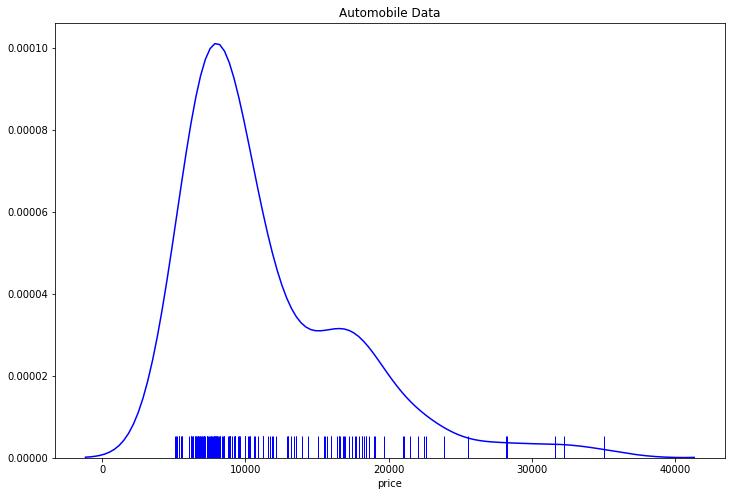

In [22]:
plt.figure(figsize=(12,8))

sns.distplot(automobile_data['price'], 
             hist=False, rug=True, color='blue')

plt.title('Automobile Data')

plt.show()

#### Rug plot

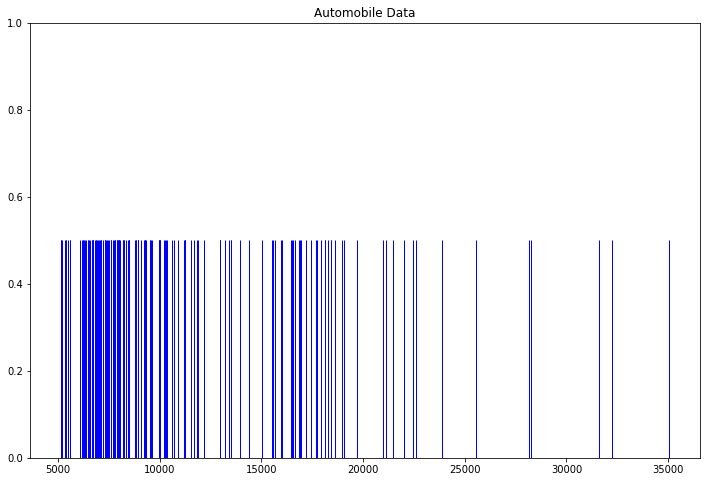

In [23]:
plt.figure(figsize=(12,8))

sns.rugplot(automobile_data['price'], 
            height=0.5, color='blue')

plt.title('Automobile Data')

plt.show()

* Kde plot will let's know the density of each range of the price

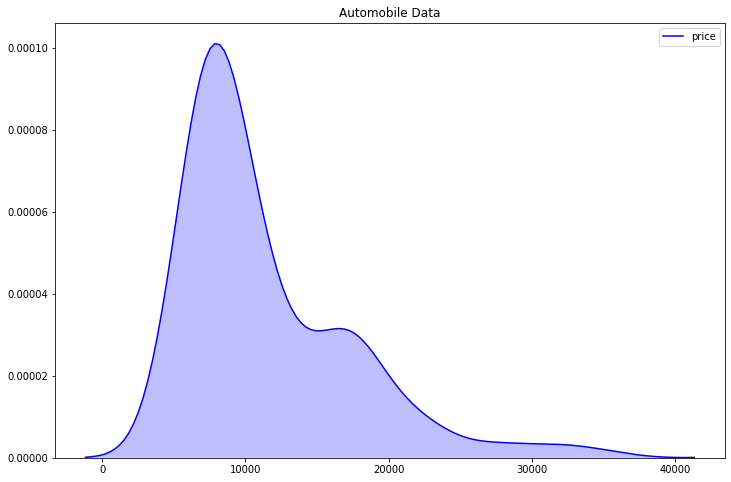

In [24]:
plt.figure(figsize=(12,8))

sns.kdeplot(automobile_data['price'], 
            shade=True, color='blue')

plt.title('Automobile Data')

plt.show()

#### Scatterplot

* Now let's take the horsepower and price of the car from the automobile data, So basically the horsepower is increasing according to price

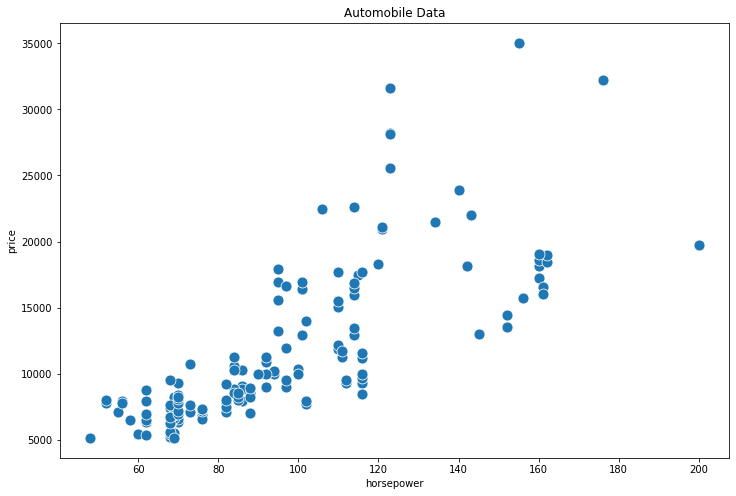

In [25]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='horsepower', y='price', 
                data=automobile_data, s=120)

plt.title('Automobile Data')

plt.show()

* If we will check the number of cylinders according to the price and horsepower, Most of the cars are using number of cylinders is 4.
* Also when the horsepower is increasing then the price is increasing

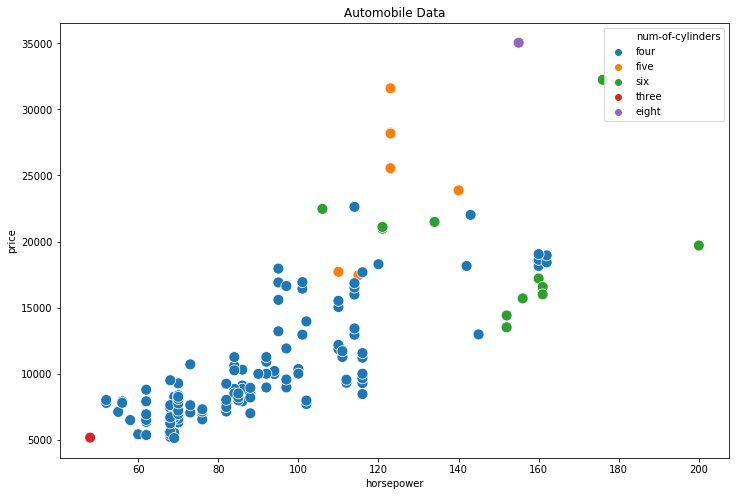

In [26]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='horsepower', y='price', 
                data=automobile_data, 
                hue='num-of-cylinders', s=120)

plt.title('Automobile Data')

plt.show()

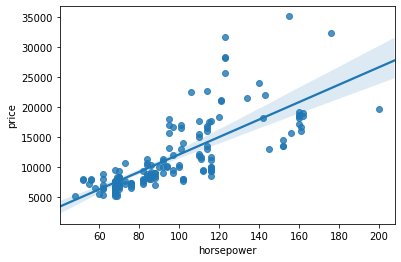

In [29]:
sns.regplot(x='horsepower', y='price', 
              data=automobile_data)

plt.show()

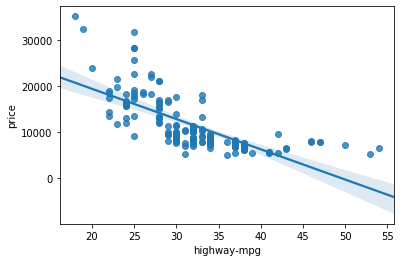

In [30]:
sns.regplot(x='highway-mpg', y='price', 
              data=automobile_data)

plt.show()

* Now let's see the relationship of horsepower and price

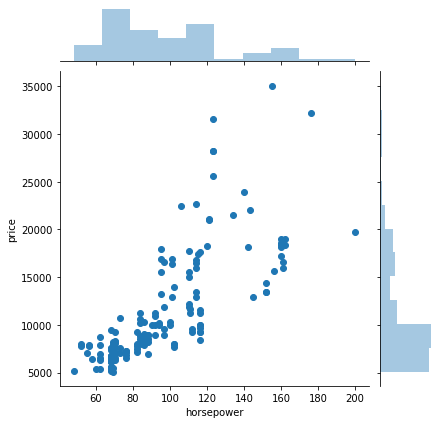

In [31]:
sns.jointplot(x='horsepower', y='price', 
              data=automobile_data)

plt.show()

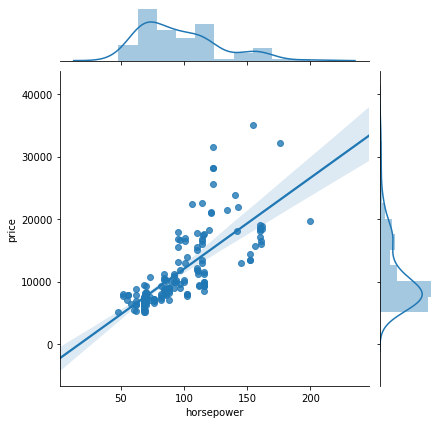

In [32]:
sns.jointplot(x='horsepower', y='price', 
              data=automobile_data, kind='reg')

plt.show()

* We can just see the density

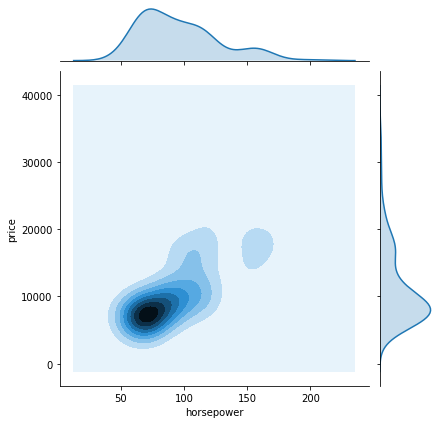

In [33]:
sns.jointplot(x='horsepower', y='price', 
              data=automobile_data, kind='kde')

plt.show()

* The better representaion is here now about the density. Now it is very clear about which horsepower and price has more density

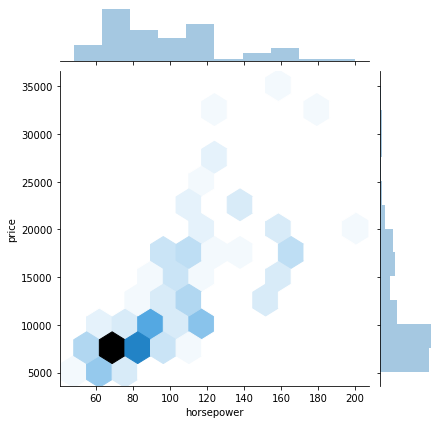

In [34]:
sns.jointplot(x='horsepower', y='price', 
              data=automobile_data, kind='hex')

plt.show()

* Also we can see the rug plot ang kde plot together , to see the distribution range
* From here we can see that, the range of horsepower 50-60 has more density, and the price for the high density is 5000-10000
* Also, the rug plot will help us to understand

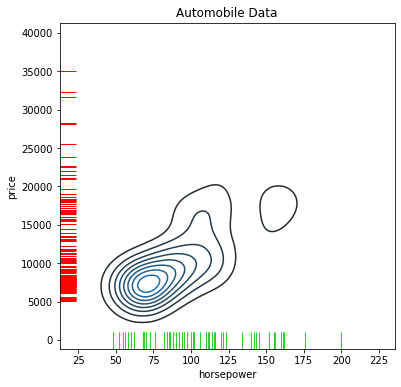

In [35]:
f, ax = plt.subplots(figsize=(6, 6))

sns.kdeplot(automobile_data['horsepower'], automobile_data['price'], ax=ax)

sns.rugplot(automobile_data['horsepower'], color="limegreen", ax=ax)
sns.rugplot(automobile_data['price'], color="red", vertical=True, ax=ax)

plt.title('Automobile Data')

plt.show()